## 2 Simulations of Langevin Dynamics 
with Guassian Initial Distribution

In [2]:
import math
import numpy as np
import scipy.linalg as la
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
# Reference (Citation): My code is based the implementation of Wasserstein Proximal Gradient Methods (https://github.com/adil-salim/WassPG) 

In [109]:
#Sequence of mean and variance
sigma20 = 100 #initial variance
m0 = 0 #initial mean

sigma2 = [sigma20]
m = [m0]
Wass = [m0**2 + (1-np.sqrt(sigma20))**2]
KL=[0.5*(sigma20 + m0**2) - 0.5*np.log(sigma20) - 0.5]
niter = 50
mk = np.copy(m0)
sigma2k = np.copy(sigma20)
eta= 0.1 #step size

# For Proximal Algorithms
for i in range(niter):
    a=(1+eta)**2
    b=-2*(1+eta)*eta-sigma2k
    c=eta**2
    sigma2k=1./(2*a)*(-b+np.sqrt(b**2-4*a*c))
    
    # mk=mk/(1-eta*(1./sigma2k-1))
    sigma2 += [sigma2k]
    m += [0]
    Wass += [mk**2 + (1-np.sqrt(sigma2k))**2] #Wasserstein update
    KL+=[0.5*(sigma2k + mk**2) - 0.5*np.log(sigma2k) - 0.5]

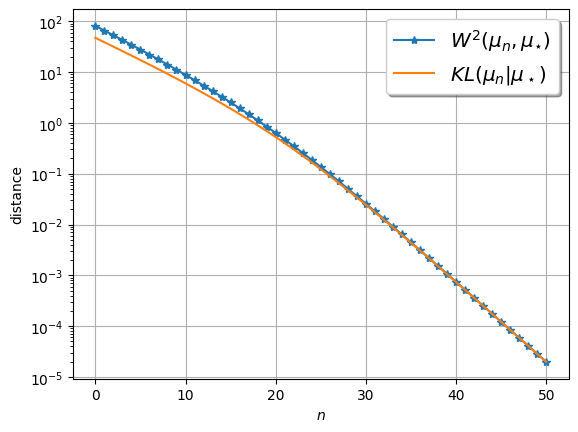

In [112]:

# upper = plt.plot(Wass_th, label = '$(1-\gamma\lambda)^{n}W^2(\mu_0,\mu_{*})$')
true = plt.plot(Wass, label = '$W^2(\mu_n,\mu_{\star})$',marker='*')
kl = plt.plot(KL, label = '$KL(\mu_n|\mu_\star)$')

legend = plt.legend(loc = 1, shadow = True, fontsize = 'x-large')
plt.ylabel('distance')
plt.xlabel('$n$')
plt.grid()
plt.yscale('log')

plt.show()